In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
train_dir = 'clean-dataset/train'
validation_dir = 'clean-dataset/validation'
image_size = 224

In [10]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
#for layer in vgg_conv.layers[:-4]: 0부터 ~ 뒤에서 -4 번까지 만 학습 안하도록 설정, 뒤 4개는 학습 함 
    layer.trainable = False  #모든 레이어 학습 안되도록 설정

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001208029E550> False
<keras.layers.convolutional.Conv2D object at 0x000001208029E0F0> False
<keras.layers.convolutional.Conv2D object at 0x000001208029E470> False
<keras.layers.pooling.MaxPooling2D object at 0x000001208029E0B8> False
<keras.layers.convolutional.Conv2D object at 0x00000120DE369CC0> False
<keras.layers.convolutional.Conv2D object at 0x00000120804C9400> False
<keras.layers.pooling.MaxPooling2D object at 0x00000120804ACF98> False
<keras.layers.convolutional.Conv2D object at 0x00000120803C80B8> False
<keras.layers.convolutional.Conv2D object at 0x00000120803B2278> False
<keras.layers.convolutional.Conv2D object at 0x0000012080395278> False
<keras.layers.pooling.MaxPooling2D object at 0x00000120804B7198> False
<keras.layers.convolutional.Conv2D object at 0x00000120804B7320> False
<keras.layers.convolutional.Conv2D object at 0x00000120804CE2B0> False
<keras.layers.convolutional.Conv2D object at 0x00000120804CEDD8> False
<ker

In [11]:
from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv) ##시퀀셜 네트웍이면 붙일 수 있다.

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 16,320,579
Trainable params: 1,605,891
Non-trainable params: 14,714,688
_________________________________________________________________


##  1. Example

In [12]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 2

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [13]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
30/30 [==============================] - 55s 2s/step - loss: 1.6532 - accuracy: 0.4617 - val_loss: 0.5817 - val_accuracy: 0.7133
Epoch 2/5
30/30 [==============================] - 58s 2s/step - loss: 0.7229 - accuracy: 0.6200 - val_loss: 0.6171 - val_accuracy: 0.7733
Epoch 3/5
30/30 [==============================] - 59s 2s/step - loss: 0.6496 - accuracy: 0.6833 - val_loss: 0.3609 - val_accuracy: 0.8600
Epoch 4/5
30/30 [==============================] - 57s 2s/step - loss: 0.5281 - accuracy: 0.7183 - val_loss: 0.7150 - val_accuracy: 0.8000
Epoch 5/5
30/30 [==============================] - 59s 2s/step - loss: 0.5696 - accuracy: 0.7133 - val_loss: 0.6078 - val_accuracy: 0.8933


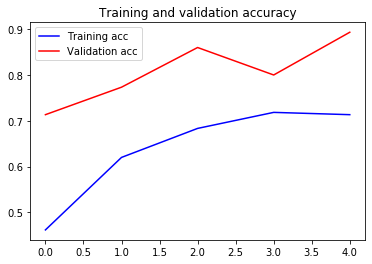

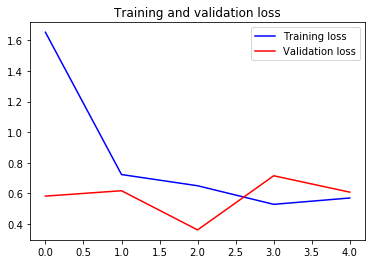

In [14]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()